<h1 style="color:purple" align="center">Handwritten digits classification using neural network</h1>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

**Importing all the required libraries and modules**

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

**Loading keras mnist hand written dataset and spliting it into train test dataset**

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

**Length of Training Data**

In [3]:
len(X_train)

60000

**Length of Test Data**

In [4]:
len(X_test)

10000

**Shape of data sample (pixel size of an image)**

In [5]:
X_train[0].shape

(28, 28)

**First image in Train Dataset at index 0**

Every image is loaded in the form of (28,28) matrix having values from 0 to 255

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

**Same image in visual representation using matplotlib**

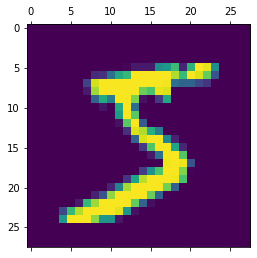

In [7]:
plt.matshow(X_train[0])

**Respective output of the image at 0 index in Training Data**

In [8]:
y_train[0]

5

**Data Scaling for better results**

All the values will be scaled to give values in between 0 to 1

In [9]:
X_train = X_train / 255
X_test = X_test / 255

**Scaled Training Data**

Scaled image at zero index

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

**Flattening the Train Test Datasets**

In [11]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

**Dimension/Shape of Flattening Data**

In [12]:
X_train_flattened.shape

(60000, 784)

**First image after flattening**

In [13]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

<h1 style='color:purple' align='center'>Very simple neural network with no hidden layers</h1>

<img src="digits_nn.jpg" />

**Dense Neural Network Model**

Build with just one input (786 neurons) and output (10 neurons) layer i.e. No hidden layer

In [14]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid') # Sigmoid Activation Function
])                                                                   # Sigmoid will predict the output in between 0 to 1

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7252 - accuracy: 0.8111
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3096 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2885 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2743 - accuracy: 0.9229
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2617 - accuracy: 0.9256


**Performance Evaluation on Testing Data**

In [15]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2669 - accuracy: 0.9256


[0.2669007480144501, 0.925599992275238]

**Model Prediction on Testing Data**

In [16]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([3.0424684e-02, 3.2882659e-07, 8.1564754e-02, 9.6201193e-01,
       2.3074448e-03, 1.4640623e-01, 2.0464493e-06, 9.9980819e-01,
       1.3705745e-01, 6.3424933e-01], dtype=float32)

**Visualization using matplotlib**

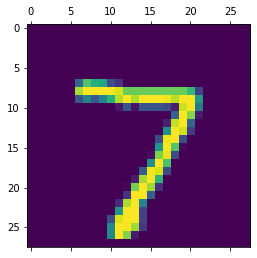

In [17]:
plt.matshow(X_test[0])

**np.argmax finds a maximum element  from an array and returns the index of it**

In [18]:
np.argmax(y_predicted[0])

7

**Applying np.argmax on all predicted values using python list comprehension**

In [19]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

**Showing first 5 values**

In [20]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

**Building Confusion Matrix for better accuracy and loss**

In [21]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    2,    2,    0,    5,    7,    2,    1,    0],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   6,   11,  909,   21,    6,    6,   13,   10,   46,    4],
       [   3,    0,   15,  922,    0,   25,    2,   11,   26,    6],
       [   2,    1,    4,    2,  914,    0,   10,    4,   12,   33],
       [   8,    3,    2,   28,   10,  786,   14,    4,   31,    6],
       [  10,    3,    2,    2,    7,   14,  915,    2,    3,    0],
       [   1,    5,   20,    9,    6,    1,    0,  951,    5,   30],
       [   5,    8,    5,   20,    9,   26,    9,   10,  875,    7],
       [  10,    7,    1,   10,   26,    8,    0,   26,   11,  910]])>

**Confusion Matrix visualization using seaborn for better accuracy and loss**

Text(69.0, 0.5, 'Truth')

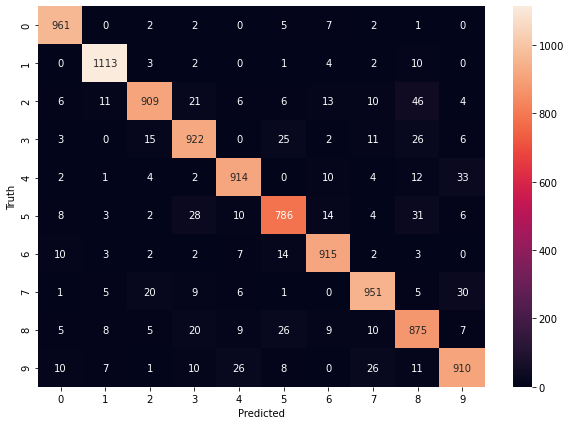

In [22]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h1 style='color:purple' align='center'>Building Neural Network Using one hidden layer</h1>

**Dense Neural Network Model**

In [23]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),    # 1 hidden layer with ReLu Activation Function
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4745 - accuracy: 0.8639
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1364 - accuracy: 0.9603
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0877 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0665 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0514 - accuracy: 0.9848


**Performance Evaluation**

In [24]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0891 - accuracy: 0.9731


[0.08913815021514893, 0.9731000065803528]

**Prediction**

In [25]:
y_predicted = model.predict(X_test_flattened)

y_predicted_labels = [np.argmax(i) for i in y_predicted]

**Confusion Matrix**

In [26]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    0,    0,    0,    0,    2,    3,    1,    3,    0],
       [   0, 1122,    4,    1,    0,    1,    3,    1,    3,    0],
       [   4,    1, 1008,    1,    3,    0,    2,    6,    6,    1],
       [   0,    0,    8,  992,    0,    1,    0,    3,    6,    0],
       [   1,    0,    5,    0,  961,    0,    1,    8,    0,    6],
       [   2,    1,    0,   19,    2,  843,   11,    1,   10,    3],
       [   5,    1,    1,    1,    6,    2,  938,    0,    4,    0],
       [   1,    4,    8,    3,    0,    0,    0, 1010,    1,    1],
       [   2,    0,    7,    8,    4,    9,    1,    9,  931,    3],
       [   4,    5,    1,    8,   10,    1,    0,   23,    2,  955]])>

**Confusion Matrix Visualization**

Text(69.0, 0.5, 'Truth')

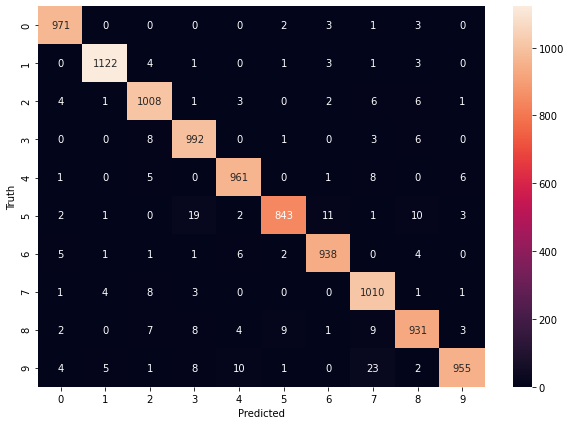

In [27]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h1 align='center' style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h1>

**Dense Neural Network Model**

In [28]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4448 - accuracy: 0.8755
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1384 - accuracy: 0.9595
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0901 - accuracy: 0.9718
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0692 - accuracy: 0.9790
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0518 - accuracy: 0.9850
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0405 - accuracy: 0.9875
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0327 - accuracy: 0.9904
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0262 - accuracy: 0.9925
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0209 - accuracy: 0.9942
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.019

**Performance Evaluation**

In [29]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0808 - accuracy: 0.9771


[0.0807918906211853, 0.9771000146865845]